<a href="https://colab.research.google.com/github/errec-sun/brain/blob/master/9_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_9_%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Теоретический материал:* https://youtu.be/6svKha_FyE4?t=1920

*Разбор данного раздела:* https://youtu.be/6svKha_FyE4?t=3193

In [0]:
from tensorflow.keras.models import Model, Sequential # загружаем абстрактный класс базовой модели сети от кераса и последовательную модель
from tensorflow.keras.datasets import mnist, fashion_mnist # загружаем готовые базы mnist
# Из кераса загружаем необходимые слои для нейросети
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K # подтягиваем базовые керасовские функции
from tensorflow.keras.optimizers import Adam # загружаем выбранный оптимизатор
from tensorflow.keras import utils # загружаем утилиты кераса
from google.colab import files # модуль для загрузки файлов в colab
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
from tensorflow.keras.preprocessing import image # модуль для отрисовки изображения
import numpy as np # библиотека для работы с массивами данных
import pandas as pd # библиотека для анализа и обработки данных
from PIL import Image # модуль для отрисовки изображения
from sklearn.model_selection import train_test_split # модуль для разбивки выборки на тренировочную/тестовую
from sklearn.preprocessing import StandardScaler # модуль для стандартизации данных

#Автокодировщик

In [0]:
def baseAutoencoder(): # зададим функцию создания базового автокодировщика
    img_input = Input((28,28,1)) # задаём входные размеры

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) # входные данные передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # затем пропускаем через слой нормализации данных 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    x = MaxPooling2D()(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # пропускаем через слой нормализации данных 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    z = MaxPooling2D()(x) # передаём на слой подвыборки
    # Изображение ужали до 7*7

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 7*7 на 14*14)
    x = BatchNormalization()(x) # слой нормализации данных
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    # Сжатие MaxPooling2D не применяем

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 14*14 на 28*28)
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model.compile(optimizer=Adam(),
                  loss='mean_squared_error') # компилируем модель с оптимайзером Адам и среднеквадратичной ошибкой

    return model # функция вернёт заданную модель

In [3]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test

xTrainMnist = xTrainMnist.astype('float32')/255 # представляем в виде значений от 0 до 1

xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0], 28, 28, 1) # меняем форму, приводим к нужным нам размерам

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
modelAutoMnist = baseAutoencoder() # создаем автокодировщик
#modelAutoMnist = denoiseAutoencoder() # создаем автокодировщик для шумоподавления
# грузим данные в нашу модель, берём первые 10тыс из xTrainMnist и на вход, и на выход
modelAutoMnist.fit(xTrainMnist[:10000], xTrainMnist[:10000], epochs=100, batch_size=100, validation_data = (xTrainMnist[10000:12000], xTrainMnist[10000:12000]))

Epoch 1/100
100/100 [==============================] - 3s 29ms/step - loss: 0.0319 - val_loss: 0.1089
Epoch 2/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0054 - val_loss: 0.1050
Epoch 3/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0036 - val_loss: 0.0637
Epoch 4/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0027 - val_loss: 0.0223
Epoch 5/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0022 - val_loss: 0.0059
Epoch 6/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 9/100
100/100 [==============================] - 3s 26ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/100
100/100 [==============================] - 3s 26ms/step - loss: 0.001

In [0]:
predMnist = modelAutoMnist.predict(xTrainMnist[:12000]) # просим модель вернуть нам изображение по первым 12тыс. xTrainMnist

predMnist = predMnist * 255 # представляем в виде значений от 0 до 255
predMnist = predMnist.astype('uint8') # устанавливаем 8битовый тип

In [0]:
def plotImages(startIndex, xTrain, pred): # создадим функцию для вывода изображений как картинок
  n = 6  # количество картинок, которые хотим показать
  plt.figure(figsize=(10, 4)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(6)
      index = i + startIndex # startIndex - начиная с какого индекса хотим заплотить картинки
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(xTrain[index].reshape(28, 28)) # отрисуем правильные картинки в размере 28*28
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(28, 28)) # отрисуем обработанные сеткой картинки в размере 28*28
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()

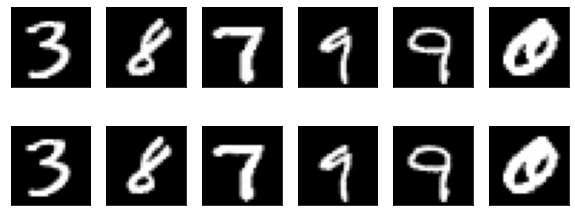

In [12]:
plotImages(10000, xTrainMnist, predMnist) # покажем исходные и восстановленные картинки

In [0]:
def getMSE(x1, x2): # создадим функцию среднеквадратичной ошибки
  x1 = x1.flatten() # сплющиваем в одномерный вектор
  x2 = x2.flatten() # сплющиваем в одномерный вектор
  delta = x1 - x2 # находим разницу
  return sum(delta ** 2) / len(delta) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [14]:
# Зададим пару массивов и проверим работу функции
x1 = np.array([1, 1, 1]) # создаем первый массив
x2 = np.array([0, 0, 0]) # создаем второй массив
print(getMSE(x1,x2)) # выведем ошибку полученную нашей функцией

1.0


In [15]:
err = [getMSE(xTrainMnist[i], predMnist[i] / 255) for i in range(len(predMnist))]# Возьмем среднеквадратичную ошибку от правильной картинки, и восстановленной, пройдя по 12тыс изображений
n = 1000
print(sum(err[0:n]) / n) # взглянем на среднюю ошибку на обучающей выборке
print(sum(err[10000:10000+n]) / n) # и на проверочной выборке

0.0002490773388177912
0.0003084648026628351


In [16]:
# Загрузим данные из fashion_mnist - базы с одеждой,обувью и т.п
(xTrainMnistF, yTrainMnistF), (xTestMnistF, yTestMnistF) = fashion_mnist.load_data()

xTrainMnistF = xTrainMnistF.astype('float32')/255 # представляем в виде значений от 0 до 1

xTrainMnistF = xTrainMnistF.reshape(xTrainMnistF.shape[0], 28, 28, 1) # меняем форму, приводим к нужным нам размерам

4423680/4422102 [==============================] - 0s 0us/step


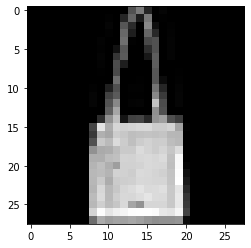

In [19]:
# Взглянем на пример изображения из базы fashion_mnist
n = 200 # выбираем картинку
xxT = xTrainMnistF[n].reshape((28,28)) # указываем размеры этой картинки как 28*28
xxT = xxT * 255 # представляем в виде значений от 0 до 255

img = Image.fromarray(xxT) # из указанного массива значений будем строить рисунок
plt.imshow(img.convert('RGBA')) # переводим в 4х-канальное цветовое пространство RGBA
plt.show() # покажем картинку

In [0]:
predMnistF = modelAutoMnist.predict(xTrainMnistF[:100]) # сделаем предикт для первых ста картинок из fashion_mnist

predMnistF = predMnistF * 255 # представляем в виде значений от 0 до 255
predMnistF = predMnistF.astype('uint8') # устанавливаем 8битовый тип

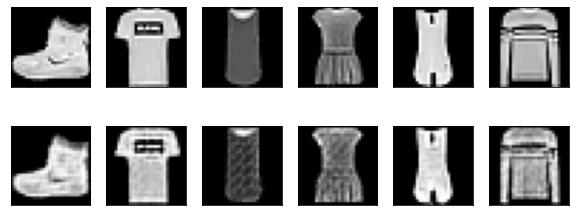

In [21]:
plotImages(0, xTrainMnistF, predMnistF) # выведем на экран картинки правильных и восстановленных изображений 

In [22]:
# Возьмем среднеквадратичные ошибки и выведем их для Mnist и для базы с одеждой 
errF = [getMSE(xTrainMnistF[i], predMnistF[i] / 255) for i in range(len(predMnistF))]
print("Ошибка на Mnist:", err[10000:10020])
print("Ошибка на одежде:", errF[:20])
print("Средняя ошибка на Mnist:", round(sum(err[10000:]) / len(err[10000:]), 4))
print("Средняя ошибка на одежде:", round(sum(errF) / len(errF), 4))
print("Максимальная ошибка на Mnist:", round(max(err[10000:]),4))
print("Минимальная ошибка на одежде:", round(min(errF),4))

Ошибка на Mnist: [0.00023166127197573827, 0.0003772881564910457, 0.0002876837101347635, 0.00039152911525041956, 0.00036881415135627405, 0.0006969846904387075, 0.00010568931671689527, 7.25191922238761e-05, 0.0012869265360003917, 0.00023901717587649846, 0.0003459619372057713, 0.00038136821633497265, 0.0004769555108070279, 0.00025908401939176215, 0.0007117944631517988, 0.0004501996886265532, 0.0003393906189099904, 0.00017432464720248193, 0.0003673037657687307, 0.00011765489013306625]
Ошибка на одежде: [0.004295600676284143, 0.009011546227797894, 0.004929109414585033, 0.008283628354555697, 0.002918638110975921, 0.012850513779965805, 0.0034403370426253164, 0.0027643016649792876, 0.0032279186795096545, 0.00166450890227339, 0.00909571823510789, 0.0037618967880974595, 0.0037834155721960163, 0.002558317693911599, 0.002418026247079845, 0.0037023242875855976, 0.00723848437878636, 0.004859003157294744, 0.009678383425077701, 0.007421478933970695]
Средняя ошибка на Mnist: 0.0003
Средняя ошибка на од

In [1]:
bias = 0.0012 # установим какое-то пороговое значение

isMnist = [e < bias for e in err[10000:]] # запишем каждую ошибку больше порогового значения, Mnist
isMnistF = [e < bias for e in errF] # запишем каждую ошибку больше порогового значения, fashion_mnist

print("Mnist распознано, как Mnist: ", round(100*sum(isMnist) / len(isMnist)),"%", sep="")
print("Одежды распознано, как Mnist: ", round(100*sum(isMnistF) / len(isMnistF)),"%", sep="")
print("Суммарная ошибка: ", round(100*(1-(sum(isMnist) / len(isMnist)) + sum(isMnistF) / len(isMnistF))),"%", sep="")

NameError: ignored

#Генерация из шума

*Разбор данного раздела:* https://youtu.be/6svKha_FyE4?t=4984

In [0]:
noise = np.random.sample((100,28,28,1)) # создаем 100 картинок шума
print(noise.shape) # выведем размеры

(100, 28, 28, 1)


In [0]:
predNoise = modelAutoMnist.predict(noise[:100]) # сделаем предикт этих шумовых картинок

predNoise = predNoise * 255 # представляем в виде значений от 0 до 255
predNoise = predNoise.astype('uint8') # устанавливаем 8битовый тип

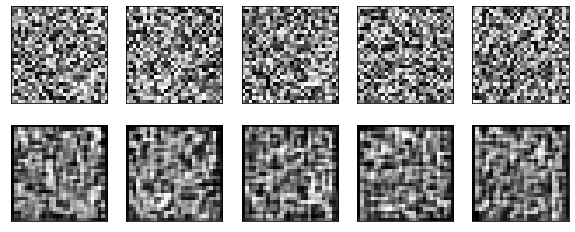

In [0]:
plotImages(0, noise, predNoise) # выведем на экран исходные шумовые картинки и восстановленые 

In [0]:
# Возьмем среднеквадратичные ошибки и выведем их для Mnist и для шумовых изображений
errN = [getMSE(noise[i], predNoise[i] / 255) for i in range(len(predMnistF))]
print("Ошибка на Mnist:", err[0:20])
print("Ошибка на шуме:", errN[0:20])
print("Средняя ошибка на Mnist:", round(sum(err) / len(err), 4))
print("Средняя ошибка на шуме:", round(sum(errN) / len(errN), 4))
print("Максимальная ошибка на Mnist:", round(max(err),4))
print("Минимальная ошибка на шуме:", round(min(errN),4))

Ошибка на Mnist: [0.00026549835559202997, 0.0003117717785003075, 0.00019774576760966936, 9.913769070532555e-05, 0.00030070850058529274, 0.0003023954616629902, 0.00011643872669829564, 0.00019233184052622104, 0.0001000988686713999, 0.00031481219723564273, 0.00045235739612665884, 0.00023434865263611038, 0.000200413502266938, 0.00044996427564343724, 4.6096870756273225e-05, 0.00020627857457295462, 0.00030959444884394596, 0.0003969038534040707, 0.0002327401826036512, 0.00019778499838661]
Ошибка на шуме: [0.0877337492116274, 0.08653944632074262, 0.0849153760191135, 0.0908481499272132, 0.08441357517381906, 0.08709429653596226, 0.08878639524184527, 0.0989819402356197, 0.0897923219006823, 0.09934104424314043, 0.09744151453099403, 0.08723363713171976, 0.07911685976442089, 0.0943974463325412, 0.09028574289583118, 0.09159389766060068, 0.09070447140331038, 0.09183227557417671, 0.08265837532414602, 0.0847272628589817]
Средняя ошибка на Mnist: 0.0003
Средняя ошибка на шуме: 0.0886
Максимальная ошибка 

#Удаление шума

*Разбор данного раздела:* https://youtu.be/6svKha_FyE4?t=5755

In [0]:
def addNoise(x, noiseVal): # объявим функцию добавления шума
  #noise = np.random.sample((x.shape[0],28,28,1))
  noise = np.random.normal(loc=0.5, scale=0.5, size=x.shape) # создаем шум(с центром в 0.5 и отклонением 0.5)
  
  # Cкладываем с произведением шума*на усилитель шума и вводим ограничение значений от 0 до 1(clip)
  return np.clip(x + noiseVal * noise, 0., 1.) 

In [0]:
noisedXTrainMnist = addNoise(xTrainMnist, 0.7) # cоздаем зашумленный вариант картинки из xTrainMnist

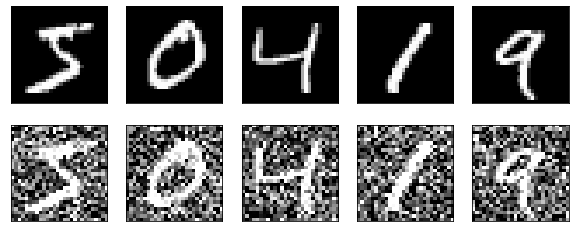

In [0]:
plotImages(0, xTrainMnist, noisedXTrainMnist) # выведем на экран исходные картинки xTrainMnist и зашумленные варианты 

In [0]:
def denoiseAutoencoder(): # объявляем функцию создания автокодировщика для подавления шума
    img_input = Input((28,28,1)) # задаём входные размеры

    # Добавляем два сверточных слоя, вместо MaxPooling используем strides
    x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Flatten()(x) # сплющиваем в одномерный вектор - размер 7*7*64
    z = Dense(16, activation='relu')(x) # добавляем полносвязный слой
    x = Dense(7*7*64, activation='relu')(z) # и еще полносвязный слой с переводом в 3136-мерное пространство(7*7*64)
    x = Reshape((7,7,64))(x) # меняем размеры - картинка 7*7 , 64 ядра
    x = Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x) # разжимаем картинки из 7*7 до 14*14
    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x) # разжимаем картинки из 14*14 до 28*28
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # и пропускаем через финальный слой двумерной свертки

    model = Model(img_input, x) # собрали модель с зашумленной картинкой на вход и с очищенной от шума на выход
    model.compile(optimizer='adam',
                  loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки

    return model # функция вернет модель подавления шума

In [0]:
#modelDenoiseMnist = denoiseAutoencoder() # задали модель подавления шума
modelDenoiseMnist = baseAutoencoder()
# Подаем на вход зашумленные картинки, а на выход правильные, исходные картинки, и обучаем
modelDenoiseMnist.fit(noisedXTrainMnist[:40000], xTrainMnist[:40000], epochs=30, batch_size=100, validation_data = (noisedXTrainMnist[40000:50000], xTrainMnist[40000:50000]))

Epoch 1/30
400/400 [==============================] - 18s 44ms/step - loss: 0.0175 - val_loss: 0.0498
Epoch 2/30
400/400 [==============================] - 17s 43ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 3/30
400/400 [==============================] - 17s 44ms/step - loss: 0.0068 - val_loss: 0.0067
Epoch 4/30
400/400 [==============================] - 17s 44ms/step - loss: 0.0064 - val_loss: 0.0070
Epoch 5/30
400/400 [==============================] - 17s 44ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 6/30
400/400 [==============================] - 17s 44ms/step - loss: 0.0061 - val_loss: 0.0068
Epoch 7/30
400/400 [==============================] - 17s 44ms/step - loss: 0.0059 - val_loss: 0.0071
Epoch 8/30
400/400 [==============================] - 17s 44ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 9/30
400/400 [==============================] - 17s 44ms/step - loss: 0.0058 - val_loss: 0.0071
Epoch 10/30
400/400 [==============================] - 17s 44ms/step - loss: 0.005

In [0]:
predMnistDenoise = modelDenoiseMnist.predict(noisedXTrainMnist[:50000]) # подаем 4тыс зашумленных картинок и делаем предикт

predMnistDenoise = predMnistDenoise * 255 # представляем в виде значений от 0 до 255
predMnistDenoise = predMnistDenoise.astype('uint8') # устанавливаем 8битовый тип

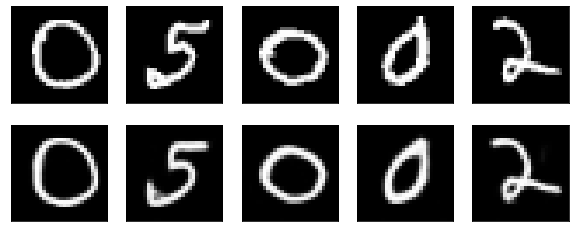

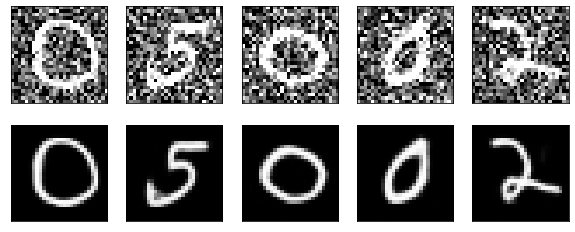

In [0]:
n = 40040
plotImages(n, xTrainMnist, predMnistDenoise) # взглянем как отрабатывает шумоподавление на xTrainMnist картинках
plotImages(n, noisedXTrainMnist, predMnistDenoise) # взглянем как отрабатывает шумоподавление на зашумленных картинках

In [0]:
noisedXTrainMnistF = addNoise(xTrainMnistF, 0.7) # зашумим картинку из fashion_mnist

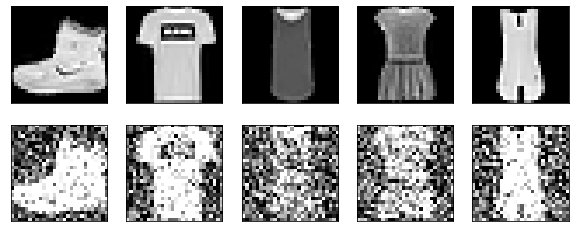

In [0]:
plotImages(0, xTrainMnistF, noisedXTrainMnistF) # выведем исходную и зашумлённую картинку из fashion_mnist

In [0]:
predMnistFDenoise = modelDenoiseMnist.predict(noisedXTrainMnistF[:4000]) # теперь попробуем подавить шум в зашумленной картинке fashion

predMnistFDenoise = predMnistFDenoise * 255 # представляем в виде значений от 0 до 255
predMnistFDenoise = predMnistFDenoise.astype('uint8') # устанавливаем 8битовый тип

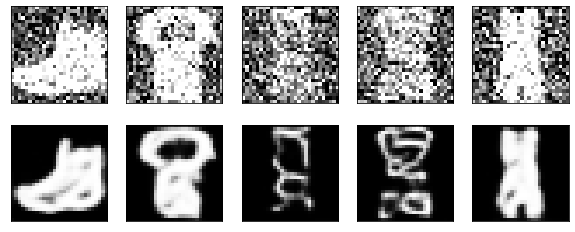

In [0]:
plotImages(0, noisedXTrainMnistF, predMnistFDenoise) # взглянем как отработала здесь модель шумоподавления

#Определение мошеннических операций

*Разбор данного раздела:* https://youtu.be/6svKha_FyE4?t=6724

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/Базы/creditcard.csv") # читаем базу

In [0]:
df[0:5] # выводим первые пять строк

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# Удаляем столбец со временем
data = df.drop(['Time'], axis=1)
# Нормализуем столбец с суммой транзакции
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

frauds = data[data.Class == 1] # записываем мошеннические операции
normal = data[data.Class == 0] # записываем нормальные операции

In [0]:
frauds.shape # смотрим какие размеры у мошеннических операций

(492, 30)

In [0]:
normal.shape # смотрим какие размеры у нормальных операций

(284315, 30)

In [0]:
RANDOM_SEED = 42 # задаем случайное значение

# берём нормальные операции и разбиваем на train_test(только 'X')
X_train, X_test = train_test_split(normal, test_size=0.2, random_state=RANDOM_SEED)

In [0]:
# Удаляем класс в обучающем наборе данных
X_train = X_train.drop(['Class'], axis=1)
# Добавляем все мошеннические транзакции в тестовый набор данных
X_test = pd.concat([X_test, frauds])
# Делаем метки для тестового набора данных
y_test = X_test['Class']
# Удаляем класс у тестового набора данных
X_test = X_test.drop(['Class'], axis=1)
# Преобразуем данные в массивы numpy
X_train = X_train.values
X_test = X_test.values


In [0]:
print(X_train.shape) # взглянем на размеры обучающих данных

(227452, 29)


In [0]:
def creditcardAutoencoder(): # объявляем автокодировщик для определения мошенич.транзакций
  dataSize = X_train.shape[1] # берём размеры X_train по второй оси(30)
  dataInput = Input(shape=(dataSize, )) # задаем эти размеры как входные в сеть
  
  x = Dense(10, activation='relu')(dataInput) # пропускаем через полносвязный слой размером 10
  x = Dense(dataSize, activation='linear')(x) # и через полносвязный слой размером 30 
  
  autoencoder = Model(inputs=dataInput, outputs=x) # собрали модель 
  
  autoencoder.compile(optimizer='Adam', loss='mse') # компилируем модель также, с выбором оптимайзера и среднеквадратичной ошибки
  
  return autoencoder 

In [0]:
model = creditcardAutoencoder()
history = model.fit(X_train, X_train,
                    epochs=5,
                    batch_size=32) # загружаем данные в модель(X_train'ы) и обучаем








Epoch 1/5





227452/227452 [==============================] - 9s 38us/step - loss: 0.4376
Epoch 2/5
227452/227452 [==============================] - 8s 33us/step - loss: 0.3557
Epoch 3/5
227452/227452 [==============================] - 8s 33us/step - loss: 0.3552
Epoch 4/5
227452/227452 [==============================] - 8s 33us/step - loss: 0.3549
Epoch 5/5
227452/227452 [==============================] - 8s 34us/step - loss: 0.3547


In [0]:
predictions = model.predict(X_test) # делаем предсказание по X_test

In [0]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1) # определяем среднеквадратичную ошибку по X_test и предсказанием по X_test

In [0]:
mse_normal = mse[y_test.values == 0] # среднеквадратичная ошибка на нормальных операциях
mse_frauds = mse[y_test.values == 1] # среднеквадратичная ошибка на мошеннических операциях

In [0]:
print("Минимальная ошибка нормальных трансакций:", round(min(mse_normal),4))
print("Максимальная ошибка нормальных трансакций:", round(max(mse_normal),4))
print("Средняя ошибка нормальных трансакций:", round(sum(mse_normal) / len(mse_normal),4))

Минимальная ошибка нормальных трансакций: 0.0416
Максимальная ошибка нормальных трансакций: 326.7216
Средняя ошибка нормальных трансакций: 0.3551


In [0]:
print("Минимальная ошибка мошеннических трансакций:", round(min(mse_frauds),4))
print("Максимальная ошибка мошеннических трансакций:", round(max(mse_frauds),4))
print("Средняя ошибка мошеннических трансакций:", round(sum(mse_frauds) / len(mse_frauds),4))

Минимальная ошибка мошеннических трансакций: 0.1658
Максимальная ошибка мошеннических трансакций: 109.5396
Средняя ошибка мошеннических трансакций: 19.3426


In [0]:
def getAccByBias(bias): # функция будет принимать какое то пороговое значение
  isNormal = mse_normal < bias # если ошибка меньше порога - то транзакция нормальная
  isFrauds = mse_frauds > bias # если ошибка больше порога - то транзакция мошенническая

  accNormal = sum(isNormal) / len(isNormal) # вычисляем процент нормальных операций
  accFaruds = sum(isFrauds) / len(isFrauds) # вычисляем процент мошеннических операций

  print("Распознано нормальных трансакций: ", round(100*accNormal), "%", sep="")
  print("Распознано мошеннических трансакций: ", round(100*accFaruds), "%", sep="")
  print("Средняя точность распознавания: ", round(50*(accNormal + accFaruds)), "%", sep="")

In [0]:
getAccByBias(1.9) # выведем данные по распознаванию с конкретным пороговым значением

Распознано нормальных трансакций: 99.0%
Распознано мошеннических трансакций: 83.0%
Средняя точность распознавания: 91.0%
